In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
file_name = 'heart.csv'
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
X = df.iloc[:, 0:13]

Seprating data, specifying x and y values

In [6]:
y = df.iloc[:, 13]

In [7]:
X= df[['age']]

used x and y as specified in document

In [8]:
y = df['thalach']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()

trained model

In [13]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred=model.predict(X_test)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

In [15]:
model.score(X_test,y_test)

0.2001555271118789

In [39]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

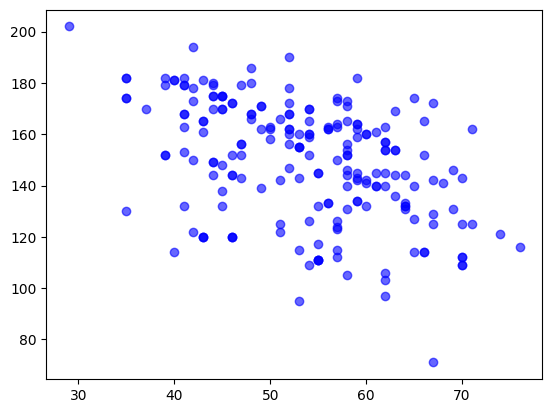

In [40]:
plt.scatter(
    X_test,  
    y_test,  
    color='blue',
    label='Actual Test Data (Age vs. Thalach)',
    alpha=0.6
)

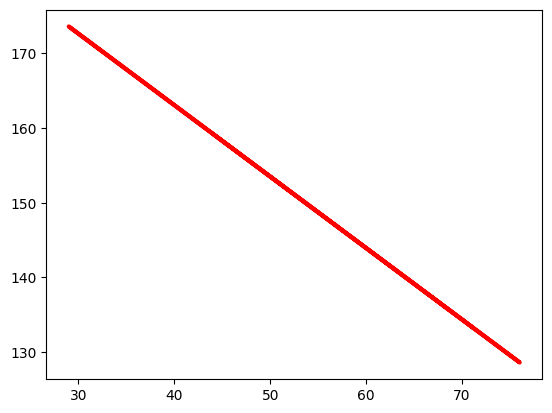

In [41]:
plt.plot(
    X_test,  # Use the same X-values
    y_pred,
    color='red',
    linewidth=3,
    label='Regression Line (Model Prediction)'
)

In [16]:
X2=df[['age','sex','cp','trestbps','chol']]

In [17]:
y2 = df['target'].apply(lambda x: 1 if x > 0 else 0)


inorder to get values only as 0 and 1

In [18]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model2=LogisticRegression(max_iter=1000)

In [21]:
model2.fit(X2_train,y2_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
y_pred2=model2.predict(X2_test)
y_pred_class2 = np.where(y_pred2 >= 0.5, 1, 0)

In [23]:
model2.score(X2_test,y2_test)

0.7609756097560976

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y2_test, y_pred_class2)
print(cm2)

[[76 22]
 [27 80]]


It displays the actual vs predicted values. 76 istrue negative, 22 is false positive, 27 iis false negative, 80 is true positive

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y2_test,y_pred_class2))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        98
           1       0.78      0.75      0.77       107

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



The F1-Score is the harmonic mean (a specific type of average) of two other core metrics: Precision and Recall.
precision is how many times model was correct in determining heart disease 
recall is how many heart diseases were correctly identified

In [28]:
from sklearn.metrics import roc_auc_score


In [29]:
y_pred_prob = model2.predict_proba(X2_test)[:, 1]

In [30]:
y_pred_class = (y_pred_prob >= 0.5).astype(int)


In [31]:
from sklearn.metrics import roc_auc_score

y_pred_prob = model2.predict_proba(X2_test)
roc_auc = roc_auc_score(y2_test, y_pred_class, multi_class='ovr')
print("ROC AUC:", roc_auc)


ROC AUC: 0.7615868777417509


The AUC score is the probability that your model will correctly rank a randomly chosen sick patient  higher than a randomly chosen healthy patient .

In [32]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [33]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay

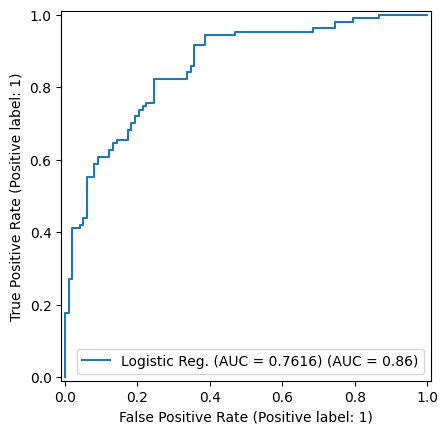

In [34]:
RocCurveDisplay.from_estimator(
    model2,
    X2_test,
    y2_test,
    name=f'Logistic Reg. (AUC = {roc_auc:.4f})'
)